In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import os
import shutil
import json
import geopandas as gpd
import math
from shapely.geometry import Polygon
from PIL import Image
from shapely.geometry import Point

In [2]:
def create_output_folder(directory, deleteFolder = False):
    if not(os.path.isdir(directory)):
        os.makedirs(directory)
    else:
        if(deleteFolder):
            shutil.rmtree(directory)
            os.makedirs(directory)

# Comparing rooftop identification

In [51]:
# Load all Google Results into a giant dataframe
basePathGoogle = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/GoogleAPItests/Results/"

parcelList = []
contructionList = []
planeIDList = []
centroidLatList = []
centroidLonList = []
azimuthList = []
tiltList =  []
areaList = []

for parcel in os.listdir(basePathGoogle):
    for construction in os.listdir(basePathGoogle + parcel):
        responseFile = basePathGoogle + parcel + "/" + construction + "/BuildingInsights.json"
        with open(responseFile, 'r') as file:
            file_content = file.read().replace("'", '"')
        solar_info = json.loads(file_content)

        for idx in range(len(solar_info['solarPotential']['roofSegmentStats'])):
            planeIDList.append(idx)
            centroidLatList.append(solar_info['solarPotential']['roofSegmentStats'][idx]['center']['latitude'])
            centroidLonList.append(solar_info['solarPotential']['roofSegmentStats'][idx]['center']['longitude'])
            azimuthList.append(solar_info['solarPotential']['roofSegmentStats'][idx]['azimuthDegrees'])
            tiltList.append(solar_info['solarPotential']['roofSegmentStats'][idx]['pitchDegrees'])
            areaList.append(solar_info['solarPotential']['roofSegmentStats'][idx]["stats"]['groundAreaMeters2'])

            parcelList.append(parcel)
            contructionList.append(construction)

identificationDF = pd.DataFrame({
    "parcel":parcelList,
    "construction":contructionList,
    "planeID": planeIDList,
    "centroidLatitude": centroidLatList,
    "centroidLongitude": centroidLonList,
    "azimuth": azimuthList,
    "tilt": tiltList,
    "area": areaList
})

duplicates = identificationDF.loc[identificationDF.drop(columns=["construction"]).duplicated(keep='first')]

non_duplicates = identificationDF.loc[~identificationDF.drop(columns=["construction"]).duplicated(keep='first')].reset_index(drop=True).drop(columns=["construction"])
non_duplicates.to_csv("/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Results/Test_70_el Besòs i el Maresme/GoogleComparison/GoogleRooftops.csv", index=False)
non_duplicates

,parcel,planeID,centroidLatitude,centroidLongitude,azimuth,tilt,area
0,4151302DF3845A,0,41.412849,2.211680,225.818400,14.359937,347.30
1,4151302DF3845A,1,41.412901,2.211816,225.723300,14.474403,261.02
2,4151302DF3845A,2,41.412724,2.211336,225.899060,17.038765,154.16
3,4151302DF3845A,3,41.412787,2.211418,225.885180,17.036642,152.83
4,4151302DF3845A,4,41.412849,2.211503,225.751280,16.937689,150.06
...,...,...,...,...,...,...,...
482,4649601DF3844H,94,41.411393,2.216577,245.355870,3.861747,4.89
483,4649601DF3844H,95,41.411218,2.216454,24.604246,4.108605,4.67
484,4649601DF3844H,96,41.411232,2.216420,73.216900,6.636325,4.60
485,4649601DF3844H,97,41.411307,2.216335,46.416584,6.272761,4.58


In [54]:
# Load all my results into a giant dataframe
basePathParcels = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Results/Test_70_el Besòs i el Maresme/Parcels/"

parcelList = []
contructionList = []
planeIDList = []
centroidLatList = []
centroidLonList = []
azimuthList = []
tiltList =  []
areaList = []
silhouetteList = []

for parcel in os.listdir(basePathParcels):
    for construction in [x for x in os.listdir(basePathParcels + parcel) if os.path.isdir(basePathParcels + parcel + "/" + x)]:
        planeFile = basePathParcels + parcel + "/" + construction + "/Plane Identification/" + construction + ".gpkg"
        planesGDF = gpd.read_file(planeFile)
        planesGDF = planesGDF.to_crs("EPSG:4326")

        for idx, row in planesGDF.iterrows():
            try:
                centroidLatList.append(row["geometry"].centroid.y)
                centroidLonList.append(row["geometry"].centroid.x)

                parcelList.append(parcel)
                contructionList.append(construction)

                planeIDList.append(row["cluster"])
                
               
                azimuthList.append(row["azimuth"])
                tiltList.append(row["tilt"])
                areaList.append(row["geometry"].area)
                silhouetteList.append(row["silhouette"])
            except:
                print(parcel, construction, idx)

identificationDF = pd.DataFrame({
    "parcel":parcelList,
    "construction":contructionList,
    "planeID": planeIDList,
    "centroidLatitude": centroidLatList,
    "centroidLongitude": centroidLonList,
    "azimuth": azimuthList,
    "tilt": tiltList,
    "area": areaList,
    "silhouette": silhouetteList
})

identificationDF.to_csv("/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Results/Test_70_el Besòs i el Maresme/GoogleComparison/MyRooftops.csv", index=False)
identificationDF
identificationDF

4054901DF3845C 415 1
4054901DF3845C 487 0
4649601DF3844H 546 0


,parcel,construction,planeID,centroidLatitude,centroidLongitude,azimuth,tilt,area,silhouette
0,4151302DF3845A,139,3,41.412830,2.211587,339.609312,0.086,3.129879e-08,0.632105
1,4151302DF3845A,139,1,41.412839,2.211495,143.199484,0.258,1.173136e-07,0.550025
2,4151302DF3845A,139,6,41.412844,2.211548,136.576583,0.192,3.066900e-09,0.784021
3,4151302DF3845A,139,4,41.412836,2.211607,140.146805,0.437,2.110201e-08,0.575725
4,4151302DF3845A,139,2,41.412832,2.211536,317.159530,0.125,7.266388e-08,0.577156
...,...,...,...,...,...,...,...,...,...
176,4649601DF3844H,546,2,41.411159,2.216164,123.383108,0.019,3.748355e-09,0.916273
177,4649601DF3844H,575,2,41.411037,2.215984,48.007441,28.888,9.422149e-10,0.757401
178,4649601DF3844H,575,1,41.411041,2.216004,107.292048,14.147,7.771340e-10,0.675573
179,4649601DF3844H,576,2,41.410986,2.215925,238.617485,12.425,1.767936e-10,0.825521


# Getting Google Panels

In [106]:
def json2gdf(solar_info):
    solarDF = pd.json_normalize(solar_info['solarPotential']['solarPanels'])

    solarDF["azimuth"] = solarDF["segmentIndex"].apply(
        lambda idx: solar_info['solarPotential']['roofSegmentStats'][idx]["azimuthDegrees"]
    )

    solarDF["tilt"] = solarDF["segmentIndex"].apply(
        lambda idx: solar_info['solarPotential']['roofSegmentStats'][idx]["pitchDegrees"]
    )

    solarDF["height"] = np.where(solarDF["orientation"] == "LANDSCAPE", solar_info["solarPotential"]["panelWidthMeters"], solar_info["solarPotential"]["panelHeightMeters"])
    solarDF["width"] = np.where(solarDF["orientation"] == "LANDSCAPE", solar_info["solarPotential"]["panelHeightMeters"], solar_info["solarPotential"]["panelWidthMeters"])
    solarDF["height"] = solarDF["height"]*np.cos(solarDF["tilt"]*math.pi/180)

    EARTH_RADIUS = 6378137.0

    # Function to calculate corners
    def calculate_corners(row):
        lat = row["center.latitude"]
        lon = row["center.longitude"]
        azimuth = np.radians(row["azimuth"])
        height = row["height"]
        width = row["width"]

        # Calculate dx, dy for height (aligned with azimuth)
        dy_height = (height / 2) * np.cos(azimuth)
        dx_height = (height / 2) * np.sin(azimuth)

        # Calculate dx, dy for width (perpendicular to azimuth)
        dy_width = (width / 2) * np.cos(azimuth + np.pi / 2)
        dx_width = (width / 2) * np.sin(azimuth + np.pi / 2)

        # Convert meters to degrees
        delta_lat_height = dy_height / EARTH_RADIUS * (180 / np.pi)
        delta_lon_height = dx_height / (EARTH_RADIUS * np.cos(np.radians(lat))) * (180 / np.pi)

        delta_lat_width = dy_width / EARTH_RADIUS * (180 / np.pi)
        delta_lon_width = dx_width / (EARTH_RADIUS * np.cos(np.radians(lat))) * (180 / np.pi)

        # Calculate corners
        corners = {
            "sw": (lat - delta_lat_height - delta_lat_width, lon - delta_lon_height - delta_lon_width),
            "se": (lat - delta_lat_height + delta_lat_width, lon - delta_lon_height + delta_lon_width),
            "nw": (lat + delta_lat_height - delta_lat_width, lon + delta_lon_height - delta_lon_width),
            "ne": (lat + delta_lat_height + delta_lat_width, lon + delta_lon_height + delta_lon_width)
        }
        return corners

    # Apply the function to each row
    solarDF["corners"] = solarDF.apply(calculate_corners, axis=1)
    solarDF["latitudes"] = solarDF["corners"].apply(lambda corners: [corners["sw"][0], corners["se"][0], corners["ne"][0], corners["nw"][0], corners["sw"][0]])
    solarDF["longitudes"] = solarDF["corners"].apply(lambda corners: [corners["sw"][1], corners["se"][1], corners["ne"][1], corners["nw"][1], corners["sw"][1]])
    solarDF["geometry"] = solarDF.apply(lambda row: Polygon(zip(row['longitudes'], row['latitudes'])), axis=1)

    gdf = gpd.GeoDataFrame(solarDF, geometry='geometry', crs="EPSG:4326")
    gdf = gdf[["center.latitude", "center.longitude", "yearlyEnergyDcKwh", "geometry"]]
    return gdf

In [120]:
# Load all Google Results into a giant dataframe
basePathGoogle = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/GoogleAPItests/Results/"
basePathParcels = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Results/Test_70_el Besòs i el Maresme/Parcels/"
basePathResults = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Results/Test_70_el Besòs i el Maresme/GoogleComparison/"

parcelList = []
contructionList = []
planeIDList = []
centroidLatList = []
centroidLonList = []
azimuthList = []
tiltList =  []
areaList = []

for parcel in os.listdir(basePathGoogle):
    for construction in os.listdir(basePathGoogle + parcel):
        create_output_folder(basePathResults + parcel + "/" + construction + "/Google Panel Generation/")

        cadasterFile = basePathParcels+ parcel + "/" + construction + "/Map files/" + construction + ".gpkg"
        cadasterGDF = gpd.read_file(cadasterFile)

        responseFile = basePathGoogle + parcel + "/" + construction + "/BuildingInsights.json"
        with open(responseFile, 'r') as file:
            file_content = file.read().replace("'", '"')
        solar_info = json.loads(file_content)

        gdf = json2gdf(solar_info)
        gdf.to_crs(cadasterGDF.crs, inplace=True)
        gdf = gdf.clip(mask=cadasterGDF)
        gdf.to_file(basePathResults + parcel + "/" + construction + "/Google Panel Generation/" + construction + ".gpkg")


# fig, ax = plt.subplots()
# gdf.plot(ax=ax, column="yearlyEnergyDcKwh")
# cadasterGDF.plot(ax=ax, edgecolor='black', facecolor='none')
# plt.show()

In [68]:
gdf[["center.latitude", "center.longitude", "yearlyEnergyDcKwh", "geometry"]]

,center.latitude,center.longitude,yearlyEnergyDcKwh,geometry
0,41.412559,2.211390,657.33250,"POLYGON ((2.21139 41.41257, 2.21138 41.41256, ..."
1,41.412256,2.211610,657.06290,"POLYGON ((2.21161 41.41226, 2.2116 41.41225, 2..."
2,41.412485,2.211493,656.51020,"POLYGON ((2.2115 41.41249, 2.21148 41.41248, 2..."
3,41.412423,2.211606,656.35815,"POLYGON ((2.21161 41.41243, 2.21159 41.41242, ..."
4,41.412430,2.211598,656.30910,"POLYGON ((2.2116 41.41244, 2.21159 41.41243, 2..."
...,...,...,...,...
830,41.412571,2.211743,369.75082,"POLYGON ((2.21175 41.41256, 2.21175 41.41257, ..."
831,41.412694,2.211530,368.29678,"POLYGON ((2.21153 41.41269, 2.21154 41.4127, 2..."
832,41.412623,2.211434,367.99374,"POLYGON ((2.21143 41.41261, 2.21145 41.41263, ..."
833,41.412706,2.211546,365.66570,"POLYGON ((2.21154 41.4127, 2.21156 41.41271, 2..."


# Obtaining the flux of the sample points

In [4]:
# Load all Google Results into a giant dataframe
basePathGoogle = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/GoogleAPItests/Results/"
basePathParcels = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Results/Test_70_el Besòs i el Maresme/Parcels/"
basePathResults = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Results/Test_70_el Besòs i el Maresme/GoogleComparison/"

parcelList = []
contructionList = []
planeIDList = []
centroidLatList = []
centroidLonList = []
azimuthList = []
tiltList =  []
areaList = []

import tifffile as tiff

for parcel in os.listdir(basePathGoogle):
    for construction in os.listdir(basePathGoogle + parcel):
        create_output_folder(basePathResults + parcel + "/" + construction + "/Google Annual Flux/")
        responseFile = basePathGoogle + parcel + "/" + construction + "/annualFlux.tiff"

        with tiff.TiffFile(responseFile) as tif:
            for i, page in enumerate(tif.pages):
                image = page.asarray()
                
        topY = tif.geotiff_metadata["ModelTransformation"][1][3]
        leftX = tif.geotiff_metadata["ModelTransformation"][0][3]

        PoAfolder = basePathParcels + parcel + "/" + construction + "/Solar Estimation PySAM_POA_Yearly/"
        for file in os.listdir(PoAfolder):
            points = pd.read_csv(PoAfolder + file)
            googleFluxList = []
            for idx, point in points.iterrows():
                pixelX = int((point["x"]-leftX)/0.1)
                pixelY = int((topY-point["y"])/0.1)
                googleFluxList.append(image[pixelX][pixelY])
            points.rename(columns={"annual":"simulatedFlux"})
            points["googleFlux"] = googleFluxList
            points.to_csv(basePathResults + parcel + "/" + construction + "/Google Annual Flux/" + file, index=None)

/home/jaumeasensio/anaconda3/envs/qgis_stable/lib/python3.12/site-packages/tifffile/tifffile.py:11426: UserWarning: <tifffile.TiffTag 34735 GeoKeyDirectoryTag @190> reading value from closed file
  warnings.warn(
/home/jaumeasensio/anaconda3/envs/qgis_stable/lib/python3.12/site-packages/tifffile/tifffile.py:11426: UserWarning: <tifffile.TiffTag 34264 ModelTransformationTag @178> reading value from closed file
  warnings.warn(
/home/jaumeasensio/anaconda3/envs/qgis_stable/lib/python3.12/site-packages/tifffile/tifffile.py:11426: UserWarning: <tifffile.TiffTag 34735 GeoKeyDirectoryTag @190> reading value from closed file
  warnings.warn(
/home/jaumeasensio/anaconda3/envs/qgis_stable/lib/python3.12/site-packages/tifffile/tifffile.py:11426: UserWarning: <tifffile.TiffTag 34264 ModelTransformationTag @178> reading value from closed file
  warnings.warn(
/home/jaumeasensio/anaconda3/envs/qgis_stable/lib/python3.12/site-packages/tifffile/tifffile.py:11426: UserWarning: <tifffile.TiffTag 34735 

In [177]:
parcel

'4151302DF3845A'

In [178]:
construction

'139'

In [160]:


int(x-leftX/0.1)
int(topY-y/0.1)

array([[1143.7024 , 1161.9521 , 1181.9557 , ..., 1491.6134 , 1482.6539 ,
        1478.9286 ],
       [1112.3011 , 1145.8661 , 1180.9292 , ..., 1485.7788 , 1480.419  ,
        1479.7666 ],
       [1089.7223 , 1140.4525 , 1184.4585 , ..., 1480.6575 , 1478.7749 ,
        1478.5648 ],
       ...,
       [1415.8367 , 1389.1027 , 1367.4233 , ...,  915.0006 ,  919.71747,
         920.51654],
       [1377.2389 , 1390.4355 , 1389.5833 , ...,  909.7883 ,  911.16626,
         915.35144],
       [1439.022  , 1458.5355 , 1474.4227 , ...,  904.3948 ,  906.0221 ,
         910.9553 ]], dtype=float32)

# Comparing flux differences

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from scipy.spatial import cKDTree
from matplotlib.colors import Normalize
import matplotlib.patches as mpatches
from matplotlib.cm import ScalarMappable
from matplotlib.colors import TwoSlopeNorm

import warnings
warnings.filterwarnings("ignore")

def plot_grid(x, y, z):
        # Plot the mesh
    fig, ax = plt.subplots()

    # Create a grid for x and y
    xi = np.linspace(min(x), max(x), math.ceil(max(x)-min(x)))
    yi = np.linspace(min(y), max(y), math.ceil(max(y)-min(y)))
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate z onto the grid
    zi = griddata((x, y), z, (xi, yi), method='linear')



    heatmap = plt.contourf(xi, yi, zi, levels=100, cmap='RdYlBu_r', norm=TwoSlopeNorm(vmin=np.nanmin(zi), vcenter=0, vmax=np.nanmax(zi)))
    cb = fig.colorbar(heatmap, ax=ax, label="kWh/m\u00b2/year")

    cbar_ticks = cb.ax.get_yticks()  # Get current colorbar ticks



    tree = cKDTree(np.c_[x, y])  # KDTree for distance computation
    distances, _ = tree.query(np.c_[xi.ravel(), yi.ravel()], k=1)  # Find nearest point distances
    distances = distances.reshape(xi.shape)  # Reshape to grid shape
    zi = np.ma.masked_where(distances > 2.5, zi)  # Mask zi where the distance is greater than 2m

    # cadasterGDF.plot(ax = ax, edgecolor="none", facecolor="none", linewidth=4)

    # Add axis labels and title
    plt.xlabel("x (m)")
    plt.ylabel("y (m)")

    # Show the plot
    ax.set_aspect("equal", adjustable='box')
    plt.show()

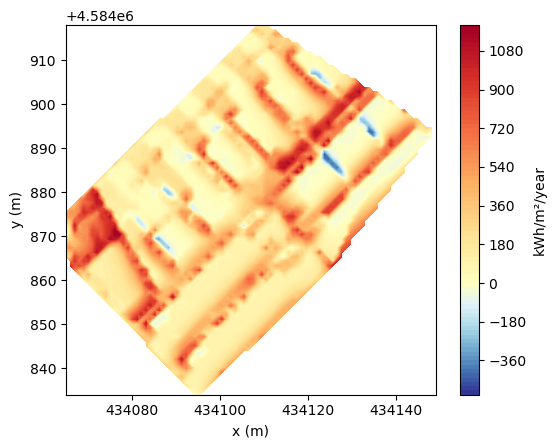

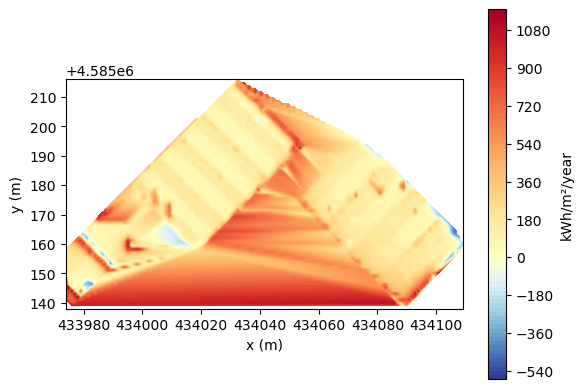

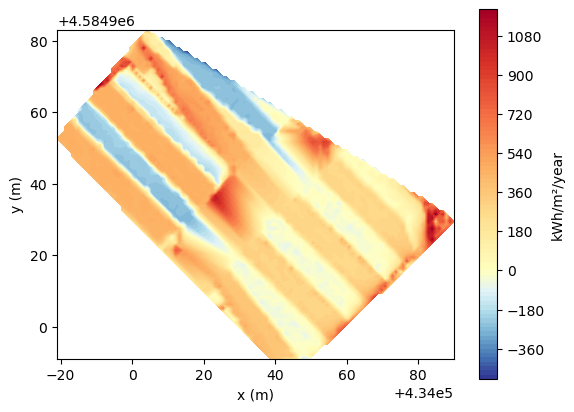

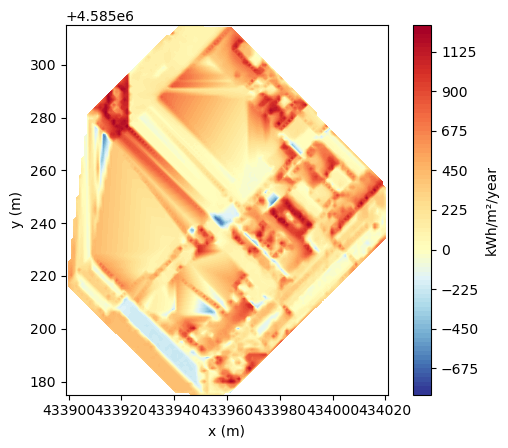

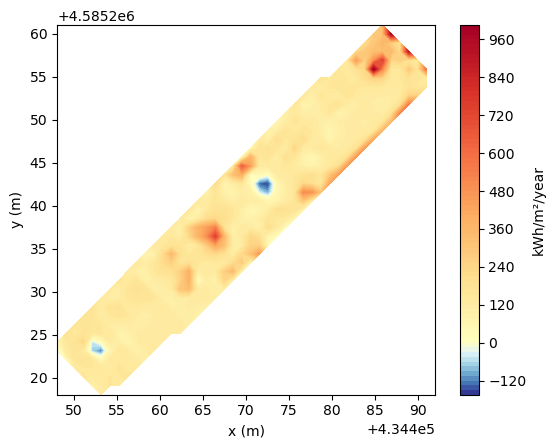

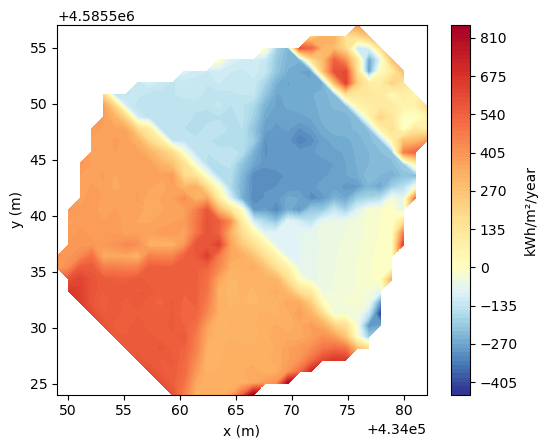

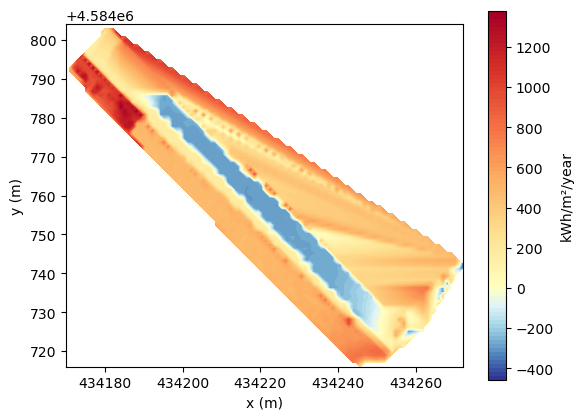

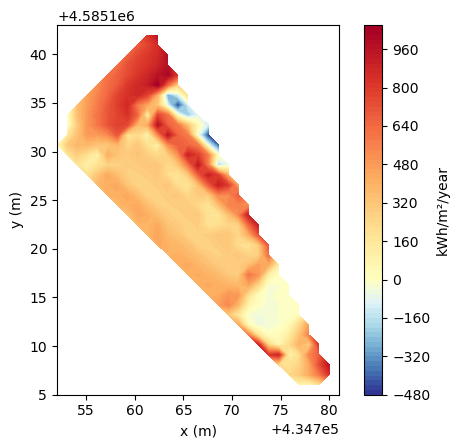

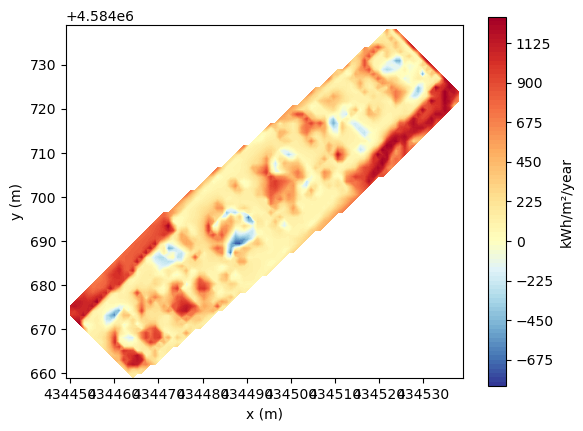

,x,y,z,annual,googleFlux
0,434143.0,4584890.0,13.30,1615.734117,1632.3406
1,434143.0,4584889.0,13.20,1592.914445,1640.0679
2,434142.0,4584891.0,13.29,1611.969155,1643.1339
3,434142.0,4584890.0,13.17,1619.372321,1644.5080
4,434142.0,4584889.0,12.99,1616.028980,1635.5255
...,...,...,...,...,...
23604,434471.0,4584678.0,34.02,1583.966761,1608.7549
23605,434469.0,4584681.0,33.93,1582.739474,1288.3485
23606,434470.0,4584679.0,34.34,1579.436485,1602.5999
23607,434469.0,4584680.0,34.11,1560.156569,1276.4946


In [11]:
basePathResults = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Results/Test_70_el Besòs i el Maresme/GoogleComparison/"

allResults = pd.DataFrame()

for parcel in [x for x in os.listdir(basePathResults) if os.path.isdir(basePathResults+x)]:
    parcelResults = pd.DataFrame()
    
    for construction in os.listdir(basePathResults + parcel):
        consturctionFolder = basePathResults + parcel + "/" + construction +"/"
        fluxFolder = consturctionFolder + "/Google Annual Flux/"
        for file in os.listdir(fluxFolder):
            partialDF = pd.read_csv(fluxFolder+file)
            allResults = pd.concat([allResults, partialDF], ignore_index=True)
            parcelResults = pd.concat([parcelResults, partialDF])

    plot_grid(parcelResults.x, parcelResults.y, parcelResults.annual-parcelResults.googleFlux)
    
# print(parcel, construction)
allResults

In [12]:
allResults["difference"] = allResults["annual"] - allResults["googleFlux"]

In [84]:
allResults["annual"].mean()

1574.8625458949455

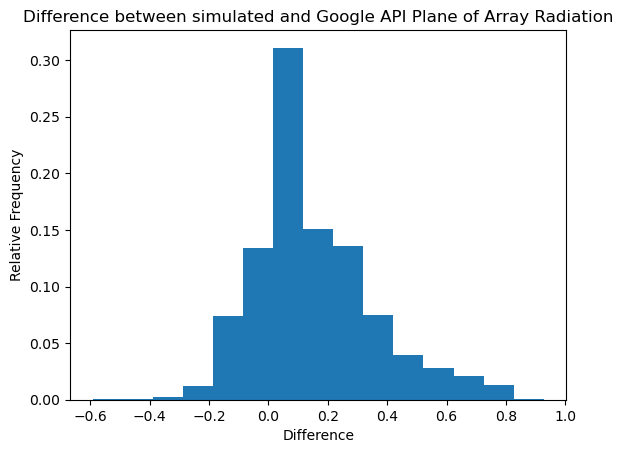

In [115]:
plt.hist(allResults["difference"]/allResults["annual"].mean(), bins = 15, weights=np.zeros_like(allResults["difference"]) + 1. / allResults["difference"].size)

plt.title("Difference between simulated and Google API Plane of Array Radiation")
plt.xlabel("Difference")
plt.ylabel("Relative Frequency")

plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Google/PoA_Hist.pdf", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [14]:
allResults["difference"].mean()

240.58613036358003

In [15]:
allResults["difference"].std()

320.98447471193555

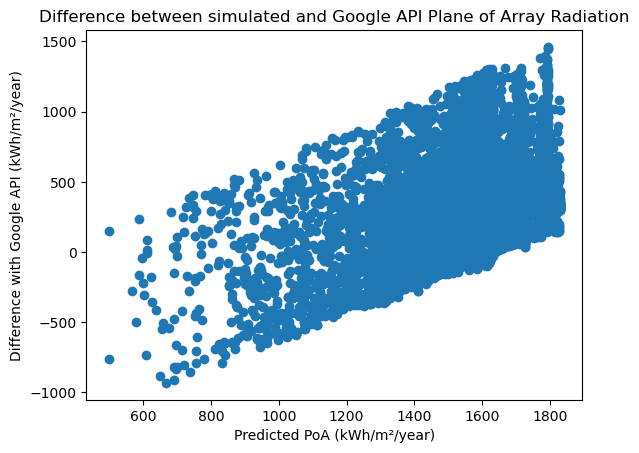

In [116]:
fig, ax = plt.subplots()
ax.scatter(allResults["annual"],allResults["difference"])
ax.set_xlabel("Predicted PoA (kWh/m²/year)")
ax.set_ylabel("Difference with Google API (kWh/m²/year)")
ax.set_title("Difference between simulated and Google API Plane of Array Radiation")
plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Google/PoA_Scatter.pdf", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

# Comparing planes detected

In [3]:
googleResultsDF = pd.read_csv("/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Results/Test_70_el Besòs i el Maresme/GoogleComparison/GoogleRooftops.csv") 
googleResultsDF
myResultsDF = pd.read_csv("/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Results/Test_70_el Besòs i el Maresme/GoogleComparison/MyRooftops.csv") 
myResultsDF


,parcel,construction,planeID,centroidLatitude,centroidLongitude,azimuth,tilt,area,silhouette
0,4151302DF3845A,139,3,41.412830,2.211587,339.609312,0.086,3.129879e-08,0.632105
1,4151302DF3845A,139,1,41.412839,2.211495,143.199484,0.258,1.173136e-07,0.550025
2,4151302DF3845A,139,6,41.412844,2.211548,136.576583,0.192,3.066900e-09,0.784021
3,4151302DF3845A,139,4,41.412836,2.211607,140.146805,0.437,2.110201e-08,0.575725
4,4151302DF3845A,139,2,41.412832,2.211536,317.159530,0.125,7.266388e-08,0.577156
...,...,...,...,...,...,...,...,...,...
176,4649601DF3844H,546,2,41.411159,2.216164,123.383108,0.019,3.748355e-09,0.916273
177,4649601DF3844H,575,2,41.411037,2.215984,48.007441,28.888,9.422149e-10,0.757401
178,4649601DF3844H,575,1,41.411041,2.216004,107.292048,14.147,7.771340e-10,0.675573
179,4649601DF3844H,576,2,41.410986,2.215925,238.617485,12.425,1.767936e-10,0.825521


In [4]:
print(len(googleResultsDF), len(myResultsDF))

487 181


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd77c9b6b10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd77c9b7110>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd77c9b6870>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd77c9b76e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd77c9b79e0>,
 'means': []}

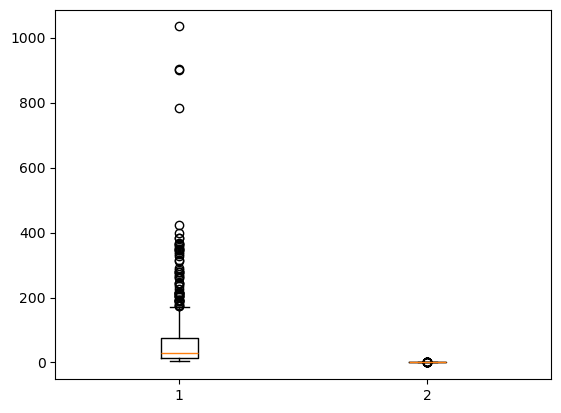

In [5]:
plt.boxplot([googleResultsDF["area"], myResultsDF["area"]])

In [6]:
basePathParcels = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Results/Test_70_el Besòs i el Maresme/Parcels/"

for parcel in myResultsDF.parcel.unique()[0:1]:
    for construction in [x for x in os.listdir(basePathParcels + parcel) if os.path.isdir(basePathParcels + parcel +"/" + x)]:
        constructionFile = basePathParcels + parcel + "/" + construction + "/Map files/" + construction + ".gpkg"
        constructionDF = gpd.read_file(constructionFile)


myResultsDF["geometry"] = myResultsDF.apply(
            lambda row: Point(row["centroidLongitude"], row["centroidLatitude"]), axis=1
        )
googleResultsDF["geometry"] = googleResultsDF.apply(
    lambda row: Point(row["centroidLongitude"], row["centroidLatitude"]), axis=1
)

myResultsGDF = gpd.GeoDataFrame(myResultsDF, geometry="geometry", crs="EPSG:4326")
myResultsGDF.to_crs(constructionDF.crs, inplace=True)
googleResultsGDF = gpd.GeoDataFrame(googleResultsDF, geometry="geometry", crs="EPSG:4326")
googleResultsGDF.to_crs(constructionDF.crs, inplace=True)

In [7]:
import contextily as ctx

for parcel in myResultsDF.parcel.unique():
    for construction in [x for x in os.listdir(basePathParcels + parcel) if os.path.isdir(basePathParcels + parcel +"/" + x)]:
        constructionFile = basePathParcels + parcel + "/" + construction + "/Map files/" + construction + ".gpkg"
        constructionDF = gpd.read_file(constructionFile)

        filtered_pointsMine = myResultsGDF[myResultsGDF.geometry.apply(
            lambda point: any(constructionDF.geometry.contains(point))
        )]

        filtered_pointsGoogle = googleResultsGDF[googleResultsGDF.geometry.apply(
            lambda point: any(constructionDF.geometry.contains(point))
        )]

        print(filtered_pointsGoogle)
    # # subsetGoogle = googleResultsDF[googleResultsDF.parcel == parcel]
    # # subsetMine = myResultsDF[myResultsDF.parcel == parcel]

    #     fig, ax = plt.subplots(figsize=(10,8))
    #     ax.scatter(filtered_pointsGoogle.centroidLongitude, filtered_pointsGoogle.centroidLatitude)
    #     dx = np.sin(np.radians(filtered_pointsGoogle['azimuth'])) * np.sin(np.radians(filtered_pointsGoogle['tilt'])) * 0.0001  # Scale tilt for length
    #     dy = np.cos(np.radians(filtered_pointsGoogle['azimuth'])) * np.sin(np.radians(filtered_pointsGoogle['tilt'])) * 0.0001  # Scale tilt for length
    #     ax.quiver(filtered_pointsGoogle['centroidLongitude'], filtered_pointsGoogle['centroidLatitude'], dx, dy,
    #             color='red',
    #         alpha=0.7
    #     )
    #     # constructionDF.plot(ax=ax, edgecolor="black", facecolor="none")

    #     ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery, crs="EPSG:4326", zoom=20)

    #     ax.set_aspect('equal')
    #     x_min, x_max = ax.get_xlim()
    #     y_min, y_max = ax.get_ylim()
    #     plt.show()

    #     fig, ax = plt.subplots(figsize=(10,8))
    #     ax.scatter(filtered_pointsMine.centroidLongitude, filtered_pointsMine.centroidLatitude)
    #     dx = np.sin(np.radians(filtered_pointsMine['azimuth'])) * np.sin(np.radians(filtered_pointsMine['tilt'])) * 0.0001  # Scale tilt for length
    #     dy = np.cos(np.radians(filtered_pointsMine['azimuth'])) * np.sin(np.radians(filtered_pointsMine['tilt'])) * 0.0001  # Scale tilt for length
    #     ax.quiver(filtered_pointsMine['centroidLongitude'], filtered_pointsMine['centroidLatitude'], dx, dy,
    #             color='blue',
    #         alpha=0.7
    #     )
    #     # constructionDF.plot(ax=ax, edgecolor="black", facecolor="none")
        
    #     ax.set_aspect('equal')
    #     ax.set_xlim(x_min, x_max)
    #     ax.set_ylim(y_min, y_max)
    #     ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery, crs="EPSG:4326", zoom=20)

    #     plt.show()

            parcel  planeID  centroidLatitude  centroidLongitude     azimuth  \
0   4151302DF3845A        0         41.412849           2.211680  225.818400   
1   4151302DF3845A        1         41.412901           2.211816  225.723300   
2   4151302DF3845A        2         41.412724           2.211336  225.899060   
3   4151302DF3845A        3         41.412787           2.211418  225.885180   
4   4151302DF3845A        4         41.412849           2.211503  225.751280   
5   4151302DF3845A        5         41.412947           2.211915  225.739210   
6   4151302DF3845A        6         41.412665           2.211254  226.152250   
7   4151302DF3845A        7         41.412899           2.211701   45.593334   
8   4151302DF3845A        8         41.412640           2.211183   45.497368   
9   4151302DF3845A        9         41.413066           2.211670   47.385952   
10  4151302DF3845A       10         41.413030           2.211613  224.373260   
11  4151302DF3845A       11         41.4

# Comparing number of panels and PV production

In [8]:
# Load all Google Results into a giant dataframe
basePathGoogle = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/GoogleAPItests/Results/"
basePathParcels = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Results/Test_70_el Besòs i el Maresme/Parcels/"
basePathResults = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Results/Test_70_el Besòs i el Maresme/GoogleComparison/"

parcelList = []
constructionList = []
countList = []
generationList = []
averageList = []

for parcel in [x for x in os.listdir(basePathResults) if os.path.isdir(basePathResults+x)]:
    for construction in  [x for x in os.listdir(basePathResults + parcel) if os.path.isdir(basePathResults + parcel + "/" + x)]:
        constructionFile = basePathResults + parcel + "/" + construction + "/Google Panel Generation/" + construction + ".gpkg"
        constructionGDF = gpd.read_file(constructionFile) 

        parcelList.append(parcel)
        constructionList.append(construction)
        countList.append(len(constructionGDF))
        generationList.append(constructionGDF.yearlyEnergyDcKwh.sum()/1000)
        averageList.append(constructionGDF.yearlyEnergyDcKwh.mean())

googlePanels = pd.DataFrame({
        "parcel":parcelList,
        "construction": constructionList,
        "count": countList,
        "generation": generationList,
        "average": averageList
    })

googlePanels

,parcel,construction,count,generation,average
0,4151302DF3845A,139,930,546.878644,588.041553
1,4151302DF3845A,305,456,263.228545,577.255581
2,4153906DF3845C,773,605,347.981127,575.175417
3,4153906DF3845C,771,618,369.830657,598.431483
4,4153906DF3845C,777,188,110.619488,588.401532
5,4151314DF3845A,613,923,528.845613,572.963828
6,4151314DF3845A,634,2,1.074981,537.490750
7,4151314DF3845A,672,600,340.141048,566.901747
8,4151314DF3845A,665,280,157.726211,563.307898
9,4151314DF3845A,609,0,0.000000,NaN


In [9]:
googlePanels["generation"].sum()/googlePanels["count"].sum()

0.5721339300920062

In [10]:
# Load all Google Results into a giant dataframe
basePathGoogle = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/GoogleAPItests/Results/"
basePathParcels = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Results/Test_70_el Besòs i el Maresme/Parcels/"
basePathResults = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Results/Test_70_el Besòs i el Maresme/GoogleComparison/"

parcelList = []
constructionList = []
countList = []
generationList = []
averageList = []

for parcel in [x for x in os.listdir(basePathParcels) if os.path.isdir(basePathParcels+x)]:
    for construction in  [x for x in os.listdir(basePathParcels + parcel) if os.path.isdir(basePathParcels + parcel + "/" + x)]:
        constructionFile = basePathParcels + parcel + "/" + construction + "/Solar Estimation Panels Simulated/" + construction + ".gpkg"
        try:
            constructionGDF = gpd.read_file(constructionFile) 

            parcelList.append(parcel)
            constructionList.append(construction)
            countList.append(len(constructionGDF))
            generationList.append(constructionGDF.yearly.sum()/1000)
            averageList.append(constructionGDF.yearly.mean())
        except:
            parcelList.append(parcel)
            constructionList.append(construction)
            countList.append(0)
            generationList.append(0)
            averageList.append(np.nan)

myPanels = pd.DataFrame({
        "parcel":parcelList,
        "construction": constructionList,
        "count": countList,
        "generation": generationList,
        "average": averageList
    })

myPanels

,parcel,construction,count,generation,average
0,4151302DF3845A,139,306,156.441828,511.247802
1,4151302DF3845A,305,328,180.357171,549.869423
2,4153906DF3845C,773,564,290.606740,515.260177
3,4153906DF3845C,771,782,404.082884,516.730031
4,4153906DF3845C,777,140,71.905565,513.611180
5,4151314DF3845A,613,140,70.397447,513.849977
6,4151314DF3845A,634,0,0.000000,NaN
7,4151314DF3845A,672,571,290.524330,508.799177
8,4151314DF3845A,665,298,150.581099,505.305701
9,4151314DF3845A,609,2,1.160090,580.045226


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd75dd9f1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd75dd9db20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd75dd9eed0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd75dd9fbc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd75dd9fec0>,
 'means': []}

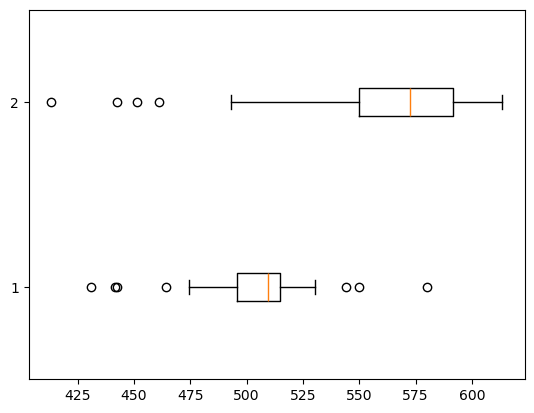

In [11]:
plt.boxplot([myPanels.dropna().average, googlePanels.dropna().average], vert=False)

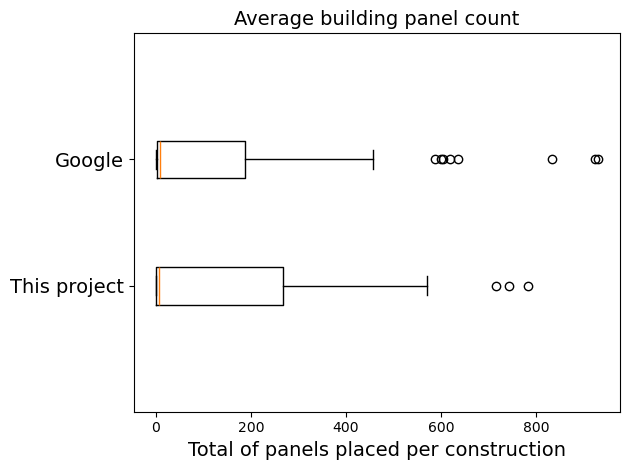

In [20]:
plt.boxplot([myPanels["count"], googlePanels["count"]], vert=False, positions=[0.5, 1])

plt.yticks([0.5, 1], ['This project', 'Google'], fontsize=14)

# Set axis titles
plt.xlabel('Total of panels placed per construction', fontsize=14)
#plt.ylabel('Model')
plt.title("Average building panel count", fontsize=14)
plt.tight_layout()
plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Google/PanelPlacement.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [132]:
print("This project:", myPanels["count"].mean(), myPanels["count"].std())
print("Google:", googlePanels["count"].mean(), googlePanels["count"].std())

This project: 144.3673469387755 220.76625023970033
Google: 170.79591836734693 271.09984166291923


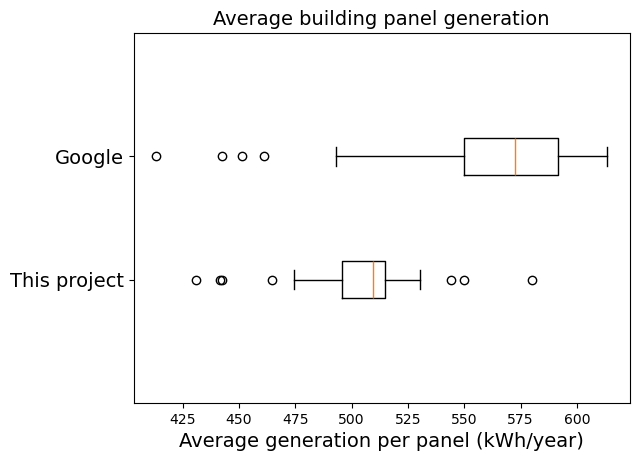

In [22]:
plt.boxplot([myPanels.dropna()["average"], googlePanels.dropna()["average"]], vert=False, positions=[0.5, 1])

plt.yticks([0.5, 1], ['This project', 'Google'], fontsize=14)

# Set axis titles
plt.xlabel('Average generation per panel (kWh/year)', fontsize=14)
# plt.ylabel('Model')
plt.title("Average building panel generation", fontsize=14)
plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Google/PanelAverage.pdf", dpi=300, bbox_inches='tight')

In [138]:
print("This project:", myPanels.dropna()["average"].mean(), myPanels.dropna()["average"].std())
print("Google:", googlePanels.dropna()["average"].mean(), googlePanels.dropna()["average"].std())

This project: 503.7190905836953 29.723571026634822
Google: 559.8779869082249 48.92373100019379


In [140]:
print("This project:", myPanels["generation"].sum(), myPanels["count"].sum(), myPanels["generation"].sum()/myPanels["count"].sum())
print("Google:", googlePanels["generation"].sum(), googlePanels["count"].sum(), googlePanels["generation"].sum()/googlePanels["count"].sum())

This project: 3615.8173786069447 7074 0.5111418403459068
Google: 4788.18886094 8369 0.5721339300920062


In [ ]:
plt.boxplot([myPanels["average"], googlePanels["average"]], vert=False, positions=[0.125, 0.5])

plt.yticks([0.125, 0.5], ['This project', 'Google'])

# Set axis titles
plt.xlabel('Total of panels placed per construction')
plt.ylabel('Model')
plt.title("Comparison of Counts Between this project and Google API panels placement")
plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Google/PanelPlacement.pdf", dpi=300, bbox_inches='tight')

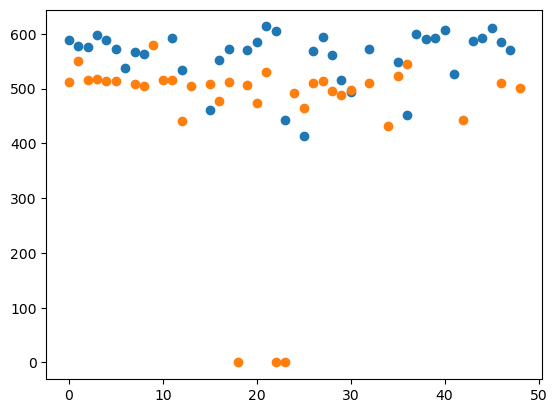

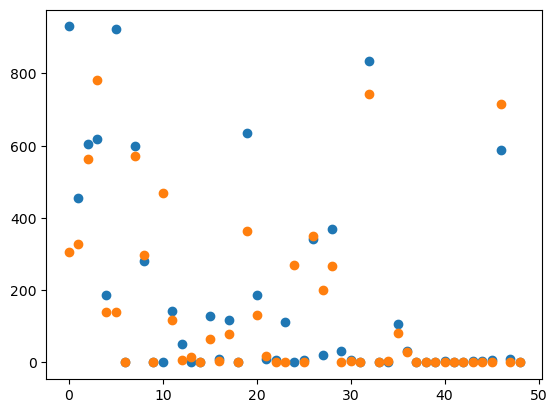

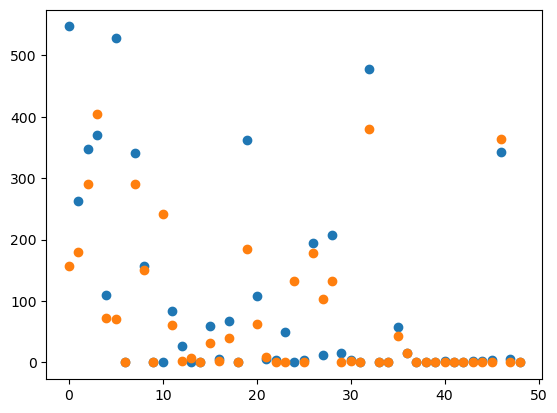

In [44]:
fig, ax = plt.subplots()
ax.scatter(googlePanels.index, googlePanels.average)
ax.scatter(myPanels.index, myPanels.average)
plt.show()

fig, ax = plt.subplots()
ax.scatter(googlePanels.index, googlePanels["count"])
ax.scatter(myPanels.index, myPanels["count"])
plt.show()

fig, ax = plt.subplots()
ax.scatter(googlePanels.index, googlePanels["generation"])
ax.scatter(myPanels.index, myPanels["generation"])
plt.show()

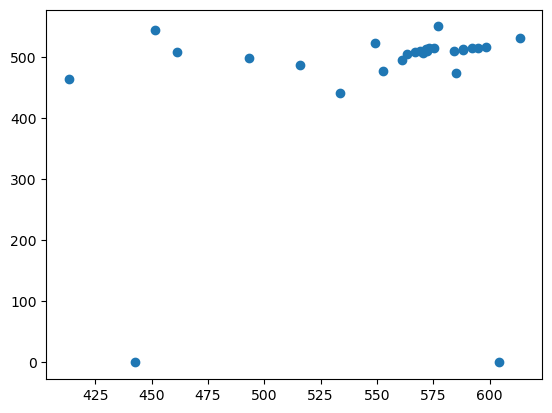

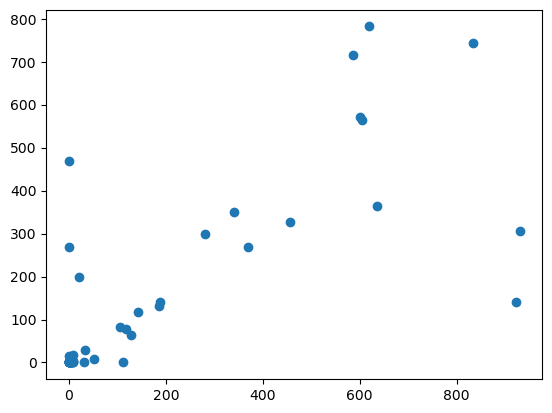

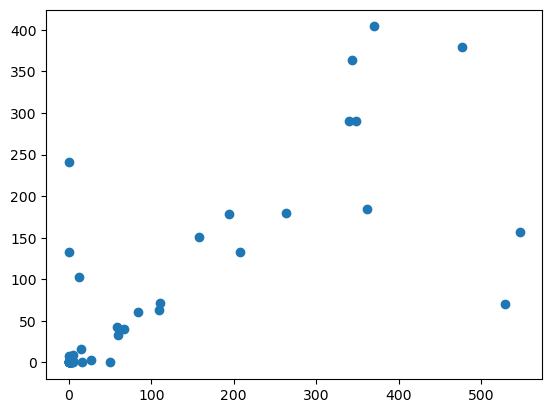

In [49]:
plt.scatter( googlePanels.average,  myPanels.average)
plt.show()
plt.scatter( googlePanels["count"],  myPanels["count"])
plt.show()
plt.scatter( googlePanels["generation"],  myPanels["generation"])
plt.show()

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(googlePanels["average"].values.reshape(-1, 1),  myPanels["average"].values)
r_squared = model.score(googlePanels["average"].values.reshape(-1, 1),  myPanels["average"].values)
r_squared

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [61]:
x,y = googlePanels["average"].values.reshape(-1, 1),  myPanels["average"].values

valid_indices = ~np.isnan(x.flatten()) & ~np.isnan(y)  # Find rows without NaN
x_clean = x[valid_indices].reshape(-1, 1)
y_clean = y[valid_indices]

# Step 2: Train the model on cleaned data
model = LinearRegression()
model.fit(x_clean, y_clean)
r_squared = model.score(x_clean, y_clean)

r_squared

0.03760332430485347